In [1]:
# https://medium.com/@financialnoob

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
stablecoin = ['BUSD', 'USDC', 'TUSD', 'USDP', 'SUSD', 'GBP', 'EUR', 'AUD']

In [20]:
df = pd.read_csv('../data/binance_daily_px.csv')
df['Date'] = pd.to_datetime(df['Date'])
# train jan-apr, test may
df.set_index(['Date'], inplace=True)
df = df.loc['2022-01-01':'2022-10-19']
# df.drop([coin+"USDT" for coin in stablecoin], axis=1, inplace=True)
df.dropna(axis=1, inplace=True)  #thresh=100, 
print(df.shape)
df.tail()

(292, 308)


,1INCHUSDT,AAVEUSDT,ACMUSDT,ADADOWNUSDT,ADAUPUSDT,ADAUSDT,ADXUSDT,AGLDUSDT,AIONUSDT,AKROUSDT,...,XTZUSDT,XVGUSDT,XVSUSDT,YFIIUSDT,YFIUSDT,YGGUSDT,ZECUSDT,ZENUSDT,ZILUSDT,ZRXUSDT
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-15,0.562,71.9,3.058,0.006466,0.557,0.3641,0.1562,0.311,0.03504,0.00385,...,1.355,0.00310,4.59,975.1,7542.0,0.3229,50.9,12.35,0.03018,0.2451
2022-10-16,0.569,75.8,3.165,0.006313,0.585,0.3703,0.1639,0.328,0.05420,0.00357,...,1.355,0.00324,4.64,991.3,7737.0,0.3246,51.8,12.72,0.03061,0.2511
2022-10-17,0.576,78.9,3.168,0.006211,0.595,0.3723,0.1583,0.322,0.04517,0.00361,...,1.389,0.00320,4.67,1009.0,7908.0,0.3158,52.8,13.07,0.03136,0.2550
2022-10-18,0.570,82.5,3.169,0.006454,0.546,0.3624,0.1560,0.311,0.04572,0.00356,...,1.375,0.00323,4.56,1018.0,7731.0,0.3036,52.4,12.83,0.03140,0.2531
2022-10-19,0.571,84.7,3.062,0.006660,0.533,0.3577,0.1577,0.311,0.04115,0.00346,...,1.372,0.00322,4.51,1021.2,7693.0,0.3013,52.0,12.72,0.03035,0.2517


In [21]:
# calculate cumulative returns
cum_return = np.log(df).diff().cumsum()+1 
cum_return.dropna(thresh=150, axis=1, inplace=True)
cum_return.dropna(axis=0, how='all', inplace=True)
print(cum_return.shape)
cum_return.head()

(291, 308)


,1INCHUSDT,AAVEUSDT,ACMUSDT,ADADOWNUSDT,ADAUPUSDT,ADAUSDT,ADXUSDT,AGLDUSDT,AIONUSDT,AKROUSDT,...,XTZUSDT,XVGUSDT,XVSUSDT,YFIIUSDT,YFIUSDT,YGGUSDT,ZECUSDT,ZENUSDT,ZILUSDT,ZRXUSDT
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-02,1.007862,0.995862,0.996925,1.001422,0.998379,0.997824,1.012144,1.069657,1.009818,1.042359,...,0.980425,0.995483,0.997509,0.986523,1.067359,1.003396,1.017805,1.017052,1.005205,1.014526
2022-01-03,1.010989,1.002999,0.988613,1.086670,0.900347,0.954790,1.011972,1.007596,1.007023,1.048624,...,1.011939,0.974899,0.964553,1.025117,1.057246,0.951961,1.001330,0.991994,0.969937,1.071991
2022-01-04,0.977653,0.944827,0.979840,1.103010,0.879661,0.947180,0.979544,0.959300,1.075969,1.068410,...,1.060699,0.969105,0.990000,0.974236,0.992438,0.925506,0.979838,1.007321,0.925119,1.015877
2022-01-05,0.912199,0.854384,0.902519,1.224637,0.722422,0.884931,0.917627,0.917511,0.957532,0.969829,...,0.948773,0.896828,0.941744,0.859753,0.883955,0.830485,0.905887,0.941240,0.860505,0.942478
2022-01-06,0.923339,0.813164,0.918885,1.146806,0.814037,0.924777,0.907531,0.963567,0.949411,0.929382,...,0.936051,0.881090,0.898639,0.887474,0.983116,0.842921,0.910263,0.897692,0.844783,0.909115


### Manual filter

In [75]:
def calculate_distances(cumret):
    '''
    calculate Euclidean distance for each pair of stocks in the dataframe
    return sorted dictionary (in ascending order)
    '''
    distances = {} # dictionary with distance for each pair
    
    # calculate distances
    for s1 in ['BTCUSDT', 'ETHUSDT']: #cumret.columns:
        for s2 in cumret.columns:
            if s1!=s2 and (f'{s1}-{s2}' not in distances.keys()) and (f'{s2}-{s1}' not in distances.keys()):
                dist = np.sqrt(np.sum((cumret[s1] - cumret[s2])**2)) # Euclidean distance
                distances[f'{s1}-{s2}'] = dist
    
    # sort dictionary
    sorted_distances = {k:v for k,v in sorted(distances.items(), key = lambda item: item[1])}
    return sorted_distances

def parse_pair(pair):
    '''
    parse pair string S1-S2
    return tickers S1, S2
    '''
    dp = pair.find('-')
    s1 = pair[:dp]
    s2 = pair[dp+1:]
    
    return s1,s2

def cadf_pvalue(s1, s2, cumret):
    '''
    perform CADF cointegration tests
    since it is sensitive to the order of stocks in the pair, perform both tests (s1-2 and s2-s1)
    return the smallest p-value of two tests
    '''
    from statsmodels.tsa.stattools import coint
    
    p1 = coint(cumret[s1], cumret[s2])[1]
    p2 = coint(cumret[s2], cumret[s1])[1]
    
    return min(p1,p2)

def calculate_halflife(spread):
    '''
    calculate half-life of mean reversion of the spread
    '''
    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant
    
    ylag = spread.shift()
    deltay = spread - ylag
    ylag.dropna(inplace=True)
    deltay.dropna(inplace=True)

    res = OLS(deltay, add_constant(ylag)).fit()
    halflife = -np.log(2)/res.params[0]
    
    return halflife

def select_pairs(sorted_distances, cumret, N=5, test=False, ml=False):
    '''
    calculate metrics for N pairs with the smallest Euclidean distance
    return dataframe of results
    '''
    from hurst import compute_Hc
    from statsmodels.tsa.stattools import adfuller
    
    pairs = [k for k,v in sorted_distances.items()][:N]
    cols = ['Euclidean distance', 'ADF p-value', 'Spread SD', '% days within 2-SD band', 
        'Hurst Exponent', 'Half-life of mean reversion']
    if test:
        cols.remove('Hurst Exponent')
    cols += ['Num zero-crossings']
    results = pd.DataFrame(index=pairs, columns=cols)
    for pair in pairs:
        s1,s2 = parse_pair(pair)
        # hedge_ratio = pairs_df.loc[pair]['Hedge ratio']
        spread = cumret[s1] - cumret[s2]
        results.loc[pair]['Euclidean distance'] = np.sqrt(np.sum((spread)**2))
        results.loc[pair]['CADF p-value'] = cadf_pvalue(s1, s2, cumret)
        results.loc[pair]['ADF p-value'] = adfuller(spread)[1]
        results.loc[pair]['Spread SD'] = spread.std()
        results.loc[pair]['Pearson r'] = np.corrcoef(cumret[s1], cumret[s2])[0][1]
        results.loc[pair]['% days within 2-SD band'] = (abs(spread) < 2*spread.std()).sum() / len(spread) * 100
        results.loc[pair]['Half-life of mean reversion'] = calculate_halflife(spread)
        results.loc[pair]['Pearson r'] = np.corrcoef(cumret[s1], cumret[s2])[0]
        if test is False:
            results.loc[pair]['Hurst Exponent'] = compute_Hc(spread)[0]   
        results.loc[pair]['Num zero-crossings'] = ((spread[1:].values * spread[:-1].values) < 0).sum()
        
    #when formation period is 6 months
    # if test is False:
    #     results = results[results['Hurst Exponent'] <= 0.5]
    # results = results[results['ADF p-value'] <= 0.1]
    # results = results[results['Spread SD'] >= 0.08]
    # results = results[results['% days within 2-SD band'] >= 90]
    # results = results[results['Num zero-crossings'] >= 10]
    # results = results[results['Half-life of mean reversion'] <= 20]
    
    # when formation period is 3 months
    if test is False:
        results = results[results['Hurst Exponent'] <= 0.5]
    results = results[results['ADF p-value'] <= 0.05]
    results = results[results['Spread SD'] >= 0.1]
    results = results[results['% days within 2-SD band'] >= 90]
    results = results[results['Num zero-crossings'] >= 5]
    results = results[results['Half-life of mean reversion'] <= 10]
    return results

def plot_pairs(sorted_distances, cumret_train, cumret_test, N=2, test=False):
    '''
    plot cumulative returns of the spread for each of N pairs with smallest Euclidean distance
    '''
    if test:
        pairs = sorted_distances
    else:
        pairs = [k for k,v in sorted_distances.items()][:N]
    
    for pair in pairs:
        s1,s2 = parse_pair(pair)
        spread_train = cumret_train[s1] - cumret_train[s2]
        spread_test = cumret_test[s1] - cumret_test[s2]
        spread_mean = spread_train.mean() # historical mean
        spread_std = spread_train.std() # historical standard deviation

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))
        fig.suptitle(f'Spread of {pair} pair', fontsize=16)
        ax1.plot(spread_train, label='spread')
        ax1.set_title('Formation period')
        ax1.axhline(y=spread_mean, color='g', linestyle='dotted', label='mean')
        ax1.axhline(y=spread_mean+2*spread_std, color='r', linestyle='dotted', label='2-SD band')
        ax1.axhline(y=spread_mean-2*spread_std, color='r', linestyle='dotted')
        ax1.legend()
        ax2.plot(spread_test, label='spread')
        ax2.set_title('Trading period')
        ax2.axhline(y=spread_mean, color='g', linestyle='dotted', label='mean')
        ax2.axhline(y=spread_mean+2*spread_std, color='r', linestyle='dotted', label='2-SD band')
        ax2.axhline(y=spread_mean-2*spread_std, color='r', linestyle='dotted')
        ax2.legend()

In [76]:
# 6m form, 3m trade
# train_start = '2022-01-01'
# train_end = '2022-06-30'
# test_start = '2022-07-01'
# test_end = '2022-10-19'

# 3m form, 1m trade
train_start = '2022-08-01'
train_end = '2022-08-31'
test_start = '2022-09-01'
test_end = '2022-09-30'

In [77]:
train_df = cum_return.loc[train_start:train_end] # formation period
train_df = train_df.dropna(axis=1) #thresh=300, 
print(train_df.shape)
test_df = cum_return.loc[test_start:test_end] # trading period
test_df = test_df.dropna(axis=1)
print(test_df.shape)

(31, 308)
(30, 308)


In [78]:
sorted_distance_train = calculate_distances(train_df)
sorted_distance_test = calculate_distances(test_df)
# [[k,v] for k,v in sorted_distance.items()][:30]

In [80]:
filtered_pairs = select_pairs(sorted_distance_train, train_df, N=10, test=True)
filtered_pairs

,Euclidean distance,ADF p-value,Spread SD,% days within 2-SD band,Half-life of mean reversion,Num zero-crossings
BTCUSDT-STRAXUSDT,0.19842,0.048641,0.03036,93.548387,2.003679,4
ETHUSDT-STPTUSDT,0.200005,0.02225,0.032472,93.548387,1.500416,8
BTCUSDT-STPTUSDT,0.214876,0.000263,0.031934,90.322581,2.392641,7
ETHUSDT-REPUSDT,0.237925,0.03747,0.041827,96.774194,2.317551,4
BTCUSDT-TRXUPUSDT,0.242532,0.931606,0.043611,93.548387,1.369944,13
...,...,...,...,...,...,...
BTCUSDT-XRPUPUSDT,11.763857,0.76618,0.055266,0.0,6.805518,0
ETHUSDT-ADAUPUSDT,14.78676,0.524389,0.095843,0.0,4.85226,0
BTCUSDT-ADAUPUSDT,15.00331,0.526462,0.097818,0.0,4.351272,0
ETHUSDT-LINKUPUSDT,16.04726,0.861916,0.134389,0.0,16.246003,0


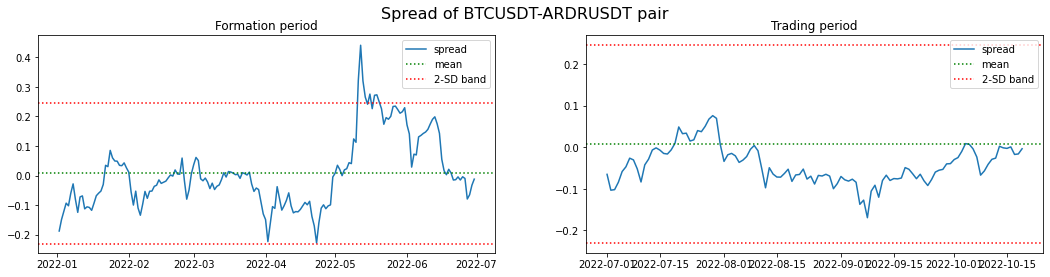

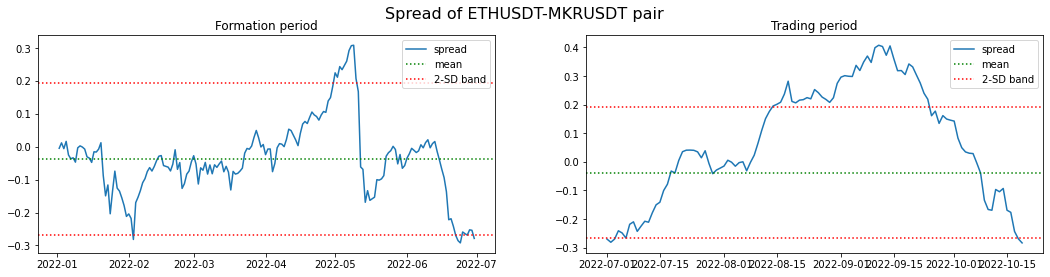

In [490]:
plot_pairs(list(filtered_pairs.index), train_df, test_df, test=True)

## Machine Learning

In [13]:
print(train_df.shape)
print(test_df.shape)

(31, 340)
(30, 337)


In [ ]:

def select_pairs(sorted_distances, cumret, N=5, test=False, ml=False):
    '''
    calculate metrics for N pairs with the smallest Euclidean distance
    return dataframe of results
    '''
    from hurst import compute_Hc
    from statsmodels.tsa.stattools import adfuller
    
    pairs = [k for k,v in sorted_distances.items()][:N]
    cols = ['Euclidean distance', 'ADF p-value', 'Spread SD', '% days within 2-SD band', 
        'Hurst Exponent', 'Half-life of mean reversion']
    if test:
        cols.remove('Hurst Exponent')
    cols += ['Num zero-crossings']
    results = pd.DataFrame(index=pairs, columns=cols)
    for pair in pairs:
        s1,s2 = parse_pair(pair)
        # hedge_ratio = pairs_df.loc[pair]['Hedge ratio']
        spread = cumret[s1] - cumret[s2]
        results.loc[pair]['Euclidean distance'] = np.sqrt(np.sum((spread)**2))
        results.loc[pair]['CADF p-value'] = cadf_pvalue(s1, s2, cumret)
        results.loc[pair]['ADF p-value'] = adfuller(spread)[1]
        results.loc[pair]['Spread SD'] = spread.std()
        results.loc[pair]['Pearson r'] = np.corrcoef(cumret[s1], cumret[s2])[0][1]
        results.loc[pair]['% days within 2-SD band'] = (abs(spread) < 2*spread.std()).sum() / len(spread) * 100
        results.loc[pair]['Half-life of mean reversion'] = calculate_halflife(spread)
        results.loc[pair]['Pearson r'] = np.corrcoef(cumret[s1], cumret[s2])[0]
        if test is False:
            results.loc[pair]['Hurst Exponent'] = compute_Hc(spread)[0]   
        results.loc[pair]['Num zero-crossings'] = ((spread[1:].values * spread[:-1].values) < 0).sum()
        
    #when formation period is 6 months
    # if test is False:
    #     results = results[results['Hurst Exponent'] <= 0.5]
    # results = results[results['ADF p-value'] <= 0.1]
    # results = results[results['Spread SD'] >= 0.08]
    # results = results[results['% days within 2-SD band'] >= 90]
    # results = results[results['Num zero-crossings'] >= 10]
    # results = results[results['Half-life of mean reversion'] <= 20]
    
    # when formation period is 3 months
    if test is False:
        results = results[results['Hurst Exponent'] <= 0.5]
    results = results[results['ADF p-value'] <= 0.05]
    results = results[results['Spread SD'] >= 0.1]
    results = results[results['% days within 2-SD band'] >= 90]
    results = results[results['Num zero-crossings'] >= 5]
    results = results[results['Half-life of mean reversion'] <= 10]
    return results /

In [14]:
train_data = calculate_metrics(sorted_distance_train, train_df, N=200)#, test=True)
test_data = calculate_metrics(sorted_distance_test, test_df, N=200)#, test=True)

BTCUSDT-STRAXUSDT
BTCUSDT STRAXUSDT
Date
2022-08-01   -0.086170
2022-08-02   -0.024078
2022-08-03   -0.014526
2022-08-04   -0.028807
2022-08-05   -0.040402
2022-08-06   -0.058601
2022-08-07   -0.049054
2022-08-08   -0.035456
2022-08-09   -0.025417
2022-08-10   -0.028086
2022-08-11   -0.046160
2022-08-12   -0.035911
2022-08-13   -0.068964
2022-08-14   -0.049038
2022-08-15   -0.035525
2022-08-16   -0.028216
2022-08-17   -0.022667
2022-08-18   -0.012463
2022-08-19    0.018727
2022-08-20    0.028465
2022-08-21    0.006730
2022-08-22   -0.039488
2022-08-23   -0.018539
2022-08-24   -0.003233
2022-08-25   -0.006568
2022-08-26    0.039432
2022-08-27    0.027636
2022-08-28    0.028996
2022-08-29    0.014879
2022-08-30    0.006195
2022-08-31   -0.016417
dtype: float64


TypeError: unhashable type: 'list'

In [718]:
idx = 6
X_train = train_data.values[:,:idx]
X_test = test_data.values[:,:idx]
y_train = train_data.values[:,idx]
y_test = test_data.values[:,idx]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(200, 6) (200, 6)
(200,) (200,)


In [581]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [720]:
len(y_train[y_train>10]) / len(y_train)

0.455

In [722]:
from sklearn.preprocessing import Binarizer
thresh=10
# binarize dependent variable
binarizer = Binarizer(threshold=thresh).fit(y_train.reshape(-1,1))
y_train_bin = binarizer.transform(y_train.reshape(-1,1))
binarizer = Binarizer(threshold=thresh).fit(y_test.reshape(-1,1))
y_test_bin = binarizer.transform(y_test.reshape(-1,1))

In [723]:
def top10_accuracy(estimator, X, y, n=10):
    '''
    compute accuracy of top 10 predictions:
    select top 10 samples with the highest probability of belonging to class 1
    return the fraction of samples actually belonging to class1
    '''
    pred_prob = estimator.predict_proba(X)
    top10_ind = np.argsort(pred_prob[:,1])[-n:]
    score = sum(y[top10_ind] == np.ones(n))/n
    return score

In [724]:
X_train.shape

(200, 6)

In [725]:
y_train_bin.shape

(200, 1)

In [726]:
def test_models_class(models, X=X_train, y=y_train_bin.flatten(), n_folds=5, scoring=top10_accuracy, seed=45):
    '''
    cross-validate each model in models using n_folds and scoring
    '''
    results = []
    names = []
    for name,model in models:
        kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print(f'{name}: {cv_results.mean()} ({cv_results.std()})')
    return results, names

In [727]:
models = []
models.append(('LR', LogisticRegressionCV(max_iter=1000, class_weight='balanced', scoring=top10_accuracy)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA_1', QuadraticDiscriminantAnalysis()))
models.append(('QDA_2', QuadraticDiscriminantAnalysis(reg_param=0.1)))
models.append(('KNN_1', KNeighborsClassifier()))
models.append(('KNN_2', KNeighborsClassifier(weights='distance')))
models.append(('CART_1', DecisionTreeClassifier(class_weight='balanced')))
models.append(('CART_2', DecisionTreeClassifier(max_features='auto', class_weight='balanced')))
models.append(('NB', GaussianNB()))
models.append(('GPC', GaussianProcessClassifier(1.0 * RBF(1.0), n_jobs=-1)))
models.append(('MLP_1', MLPClassifier(max_iter=5000)))
models.append(('MLP_2', MLPClassifier(alpha=1, max_iter=5000)))
models.append(('SVM', SVC(class_weight='balanced', probability=True)))

results,names = test_models_class(models)

LR: 0.8 (0.10954451150103324)
LDA: 0.78 (0.13266499161421602)
QDA_1: 0.74 (0.1356465996625054)
QDA_2: 0.72 (0.13266499161421602)
KNN_1: 0.7 (0.16733200530681513)
KNN_2: 0.72 (0.11661903789690603)
CART_1: 0.68 (0.1469693845669907)
CART_2: 0.7 (0.1788854381999832)
NB: 0.74 (0.048989794855663606)


/Users/natalieng/opt/anaconda3/envs/master/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalieng/opt/anaconda3/envs/master/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalieng/opt/anaconda3/envs/master/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalieng/opt/anaconda3/envs/master/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

GPC: 0.74 (0.12000000000000002)
MLP_1: 0.6599999999999999 (0.1854723699099141)
MLP_2: 0.8200000000000001 (0.17204650534085253)
SVM: 0.76 (0.17435595774162696)


In [524]:
# 6m-3m
results,names = test_models_class(models, y=y_train_bin.flatten())

LR: 0.8799999999999999 (0.0979795897113271)
LDA: 0.96 (0.07999999999999999)
KNN: 0.8800000000000001 (0.09797958971132709)
CART: 0.8399999999999999 (0.14966629547095767)
NB: 0.96 (0.07999999999999999)
SVM: 0.72 (0.3709447398198282)


In [537]:
# 3m-1m
results,names = test_models_class(models, y=y_train_bin.flatten())

LR: 0.52 (0.09797958971132709)
LDA: 0.4 (0.12649110640673517)
KNN: 0.24 (0.08)
CART: 0.36 (0.29393876913398137)
NB: 0.52 (0.2039607805437114)
SVM: 0.16 (0.14966629547095767)


In [733]:
model = SVC(class_weight='balanced', probability=True)
# model = MLPClassifier(alpha=1, max_iter=5000)
# model = LogisticRegressionCV(max_iter=1000, 
#                              class_weight='balanced', scoring=top10_accuracy)
# model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train_bin.flatten())
print(top10_accuracy(model, X_train, y_train_bin.flatten()))
print(top10_accuracy(model, X_test, y_test_bin.flatten()))

0.7
0.2


In [706]:
pred_prob = model.predict_proba(X_test) # predict probabilities
# select top 10 pairs with highest probability of belonging to class 1 (sort in descending order)
top10_ind = np.argsort(pred_prob[:,1])[-10:][::-1] 
test_data.iloc[top10_ind,:] # show data

,Euclidean distance,ADF p-value,Spread SD,% days within 2-SD band,Half-life of mean reversion,Num zero-crossings
BTCUSDT-STPTUSDT,0.175554,0.035704,0.028122,96.666667,1.072793,9
BTCUSDT-NEXOUSDT,0.354712,0.243962,0.057873,96.666667,4.413826,3
BTCUSDT-BTTCUSDT,0.284471,0.348982,0.043167,96.666667,5.205621,1
ETHUSDT-BTTCUSDT,0.295376,0.385063,0.048101,96.666667,7.429852,4
ETHUSDT-ZECUSDT,0.319139,0.606878,0.05919,100.0,6.068236,3
ETHUSDT-REPUSDT,0.321474,0.651826,0.059626,100.0,6.000472,1
BTCUSDT-DREPUSDT,0.386403,0.223584,0.06558,93.333333,2.490422,4
BTCUSDT-XLMUSDT,0.430749,0.661972,0.06993,100.0,6.898255,3
BTCUSDT-BTCSTUSDT,0.353914,0.655354,0.064947,96.666667,3.750785,3
ETHUSDT-AUTOUSDT,0.297083,0.65668,0.05384,93.333333,7.161365,2


In [708]:
top50_ind = np.argsort(pred_prob[:,1])[-50:][::-1]
top50_pairs = test_data.iloc[top50_ind,:].index

selected_pairs = []
selected_coins = []
for pair in top50_pairs:
    s1,s2 = parse_pair(pair)
    if (s1 not in selected_coins) and (s2 not in selected_coins):
        selected_coins.append(s1)
        selected_coins.append(s2)
        selected_pairs.append(pair)
        
        if len(selected_pairs)==5:
            break
selected_pairs

['BTCUSDT-STPTUSDT', 'ETHUSDT-BTTCUSDT']

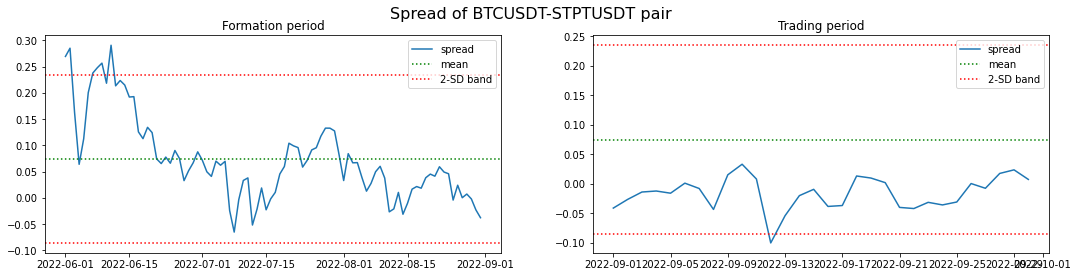

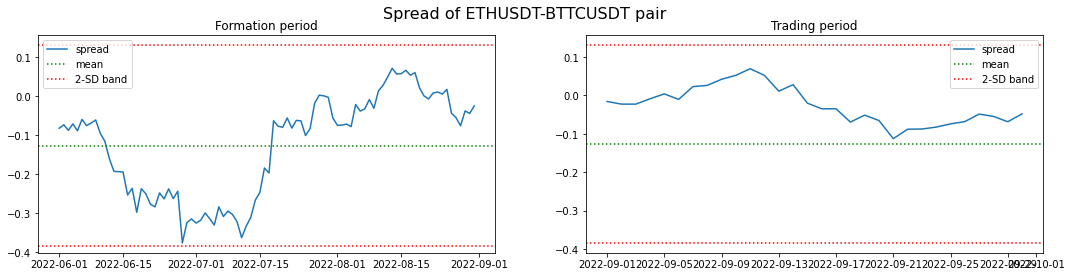

In [709]:
plot_pairs(selected_pairs, train_df, test_df, test=True)

In [538]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

ensembles = []
ensembles.append(('ADA', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(class_weight='balanced')))
ensembles.append(('ET', ExtraTreesClassifier(class_weight='balanced')))

results,names = test_models_class(ensembles, y=y_train_bin.flatten())

ADA: 0.32 (0.09797958971132713)
GBM: 0.4 (0.17888543819998315)
RF: 0.48 (0.2039607805437114)
ET: 0.43999999999999995 (0.14966629547095764)


In [100]:
# data preparation
def parse_pair(pair):
    '''
    parse pair string S1-S2
    return tickers S1, S2
    '''
    dp = pair.find('-')
    s1 = pair[:dp]
    s2 = pair[dp+1:]
    
    return s1,s2

def calculate_halflife(spread):
    '''
    calculate half-life of mean reversion of the spread
    '''
    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant
    
    ylag = spread.shift()
    deltay = spread - ylag
    ylag.dropna(inplace=True)
    deltay.dropna(inplace=True)

    res = OLS(deltay, add_constant(ylag)).fit()
    halflife = -np.log(2)/res.params[0]
    
    return halflife

def select_pairs(cumret_form, cumret_trade):
    '''
    select pairs using data from train dataframe
    return dataframe of selected pairs
    '''
    tested = []

    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant
    from hurst import compute_Hc
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.tsa.stattools import coint

    cols = ['CADF p-value', 'Num zero-crossings', 'Pearson r', 'Spread mean', 'Spread SD', 'Hurst Exponent', 
            'Half-life of mean reversion', 'Hedge ratio', 'Current spread price']
    pairs = pd.DataFrame(columns=cols)

    for s1 in cumret_form.columns:
        for s2 in cumret_form.columns:
            if s1!=s2 and (f'{s1}-{s2}' not in tested):
                tested.append(f'{s1}-{s2}')
                cadf_p = coint(cumret_form[s1], cumret_form[s2])[1]
                if cadf_p<0.01 and (f'{s2}-{s1}' not in pairs.index): # stop if pair already added as s2-s1
                    res = OLS(cumret_form[s1], add_constant(cumret_form[s2])).fit()
                    hedge_ratio = res.params[s2]
                    if hedge_ratio > 0: # hedge ratio should be posititve
                        spread_form = cumret_form[s1] - hedge_ratio*cumret_form[s2]
                        spread_mean = spread_form.mean()
                        spread_std = spread_form.std()
                        hurst = compute_Hc(spread_form)[0]
                        if hurst<0.5:
                            halflife = calculate_halflife(spread_form)
                            if halflife>1 and halflife<12:
                                # subtract the mean to calculate num_crossings
                                spread_nm = spread_form - spread_form.mean() 
                                num_crossings = (spread_nm.values[1:] * spread_nm.values[:-1] < 0).sum()
                                if num_crossings>len(cumret_form.index)/252*12: 
                                    pearson_r = np.corrcoef(cumret_form[s1], cumret_form[s2])[0][1]
                                    pairs.loc[f'{s1}-{s2}'] = [cadf_p, num_crossings, pearson_r, spread_mean, 
                                                               spread_std, hurst, halflife, hedge_ratio, 
                                                               spread_form[-1]]
                                
    return pairs

In [106]:
cols = ['CADF p-value', 'Num zero-crossings', 'Pearson r', 'Spread mean', 'Spread SD', 'Hurst Exponent', 
        'Half-life of mean reversion', 'Hedge ratio', 'Current spread price', 'Deviation from the mean (SD)', 'TTC']
data = pd.DataFrame(columns=cols)

for form_start,form_end,trade_start,trade_end in periods:
    print(f'Processing period {form_start} : {trade_end}')
    # select prices for formation and trading periods
    cumret_tmp = cum_return[form_start:trade_end]
    cumret_tmp = cumret_tmp/cumret_tmp.iloc[0]
    cumret_form = cumret_tmp[:form_end]
    cumret_trade = cumret_tmp[trade_start:]
    
    # select potential pairs
    pairs_tmp = select_pairs(cumret_form, cumret_trade)
    
    # calculate current deviation from the mean (in standard deviations)
    pairs_tmp['Deviation from the mean (SD)'] = (pairs_tmp['Current spread price'] - 
                                                 pairs_tmp['Spread mean'])/pairs_tmp['Spread SD']
    # separate deviated pairs
    deviated_pairs = pairs_tmp[(abs(pairs_tmp['Deviation from the mean (SD)'])>=2) & 
                               (abs(pairs_tmp['Deviation from the mean (SD)'])<=3)].copy()
    
    # calculate time to converge (in days)
    for pair in deviated_pairs.index:
        s1,s2 = parse_pair(pair)
        hedge_ratio = deviated_pairs.loc[pair]['Hedge ratio']
        spread_mean = deviated_pairs.loc[pair]['Spread mean']
        spread_dev = deviated_pairs.loc[pair]['Deviation from the mean (SD)']
        spread_trade = cumret_trade[s1] - hedge_ratio*cumret_trade[s2]
        # calculate time to convergence
        if spread_dev<0 and len(spread_trade[spread_trade>spread_mean])>0:
            deviated_pairs.loc[pair, ['TTC']] = (pd.to_datetime(spread_trade[spread_trade>spread_mean].index[0])
                                                 - pd.to_datetime(trade_start)).days
        elif spread_dev>0 and len(spread_trade[spread_trade<spread_mean])<0:  # CHECK
            deviated_pairs.loc[pair, ['TTC']] = (pd.to_datetime(spread_trade[spread_trade<spread_mean].index[0])
                                                 - pd.to_datetime(trade_start)).days
        else:
            deviated_pairs.loc[pair, ['TTC']] = 1000
    
    # save data
    data = pd.concat([data,deviated_pairs], axis=0, ignore_index=True)

Processing period 2022-01-01 : 2022-04-30


ValueError: Series length must be greater or equal to 100